In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from classes.Fritidshus2 import getFritidshusData, getFritidshusDataRaw, trainModel, testModel, saveModel, loadModel



In [2]:
data = getFritidshusData()
data.describe()

Cleaning
[{'name': 'Varmeinstallation', 'uniques': ['Centralvarme med én fyringsenhed', 'Elvarme', 'Fjernvarme blokvarme', 'Gasradiator', 'Ingen varmeinstallation', 'Ovn til fast og flydende brændsel', 'Varmepumpe']}, {'name': 'Ydervæg', 'uniques': ['Andet materiale', 'Betonelementer', 'Bindingsværk', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Glas', 'Letbetonsten', 'Metal', 'Mursten', 'Træ']}, {'name': 'Tag', 'uniques': ['Andet materiale', 'Betontagsten', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Levende tage', 'Metal', 'Plastmaterialer', 'Stråtag', 'Tagpap med lille hældning', 'Tagpap med stor hældning', 'Tegl']}]


,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Seneste ombygning,Boligenhed med eget køkken,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,3469.000000,3469.000000,3.469000e+03,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000
mean,6871.643125,1977.410205,1.364485e+06,1768.290574,82.399827,3.802248,1.174114,1.094840,8.450562,3.793024,643.700778,0.095128,1.749496,1124.402710,6223.198616,6669.483136
std,2138.415565,71.612989,6.433802e+05,702.751250,38.968655,1.125404,0.499375,0.464358,1.302864,3.197705,932.993758,0.293434,1.718623,476.847378,3284.835784,4448.403262
min,2300.000000,0.000000,1.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4850.000000,1969.000000,8.450000e+05,1275.000000,61.000000,3.000000,1.000000,1.000000,9.000000,2.000000,0.000000,0.000000,1.000000,874.000000,3990.000000,3629.000000
50%,6900.000000,1977.000000,1.248000e+06,1621.000000,78.000000,4.000000,1.000000,1.000000,9.000000,2.000000,0.000000,0.000000,1.000000,1200.000000,5700.000000,5906.000000
75%,8970.000000,1997.000000,1.750000e+06,2100.000000,99.000000,4.000000,1.000000,1.000000,9.000000,7.000000,1986.000000,0.000000,1.000000,1362.000000,8190.000000,8840.000000
max,9990.000000,2020.000000,2.998000e+06,7548.000000,1392.000000,20.000000,11.000000,4.000000,9.000000,10.000000,2020.000000,1.000000,6.000000,2346.000000,24500.000000,39161.000000


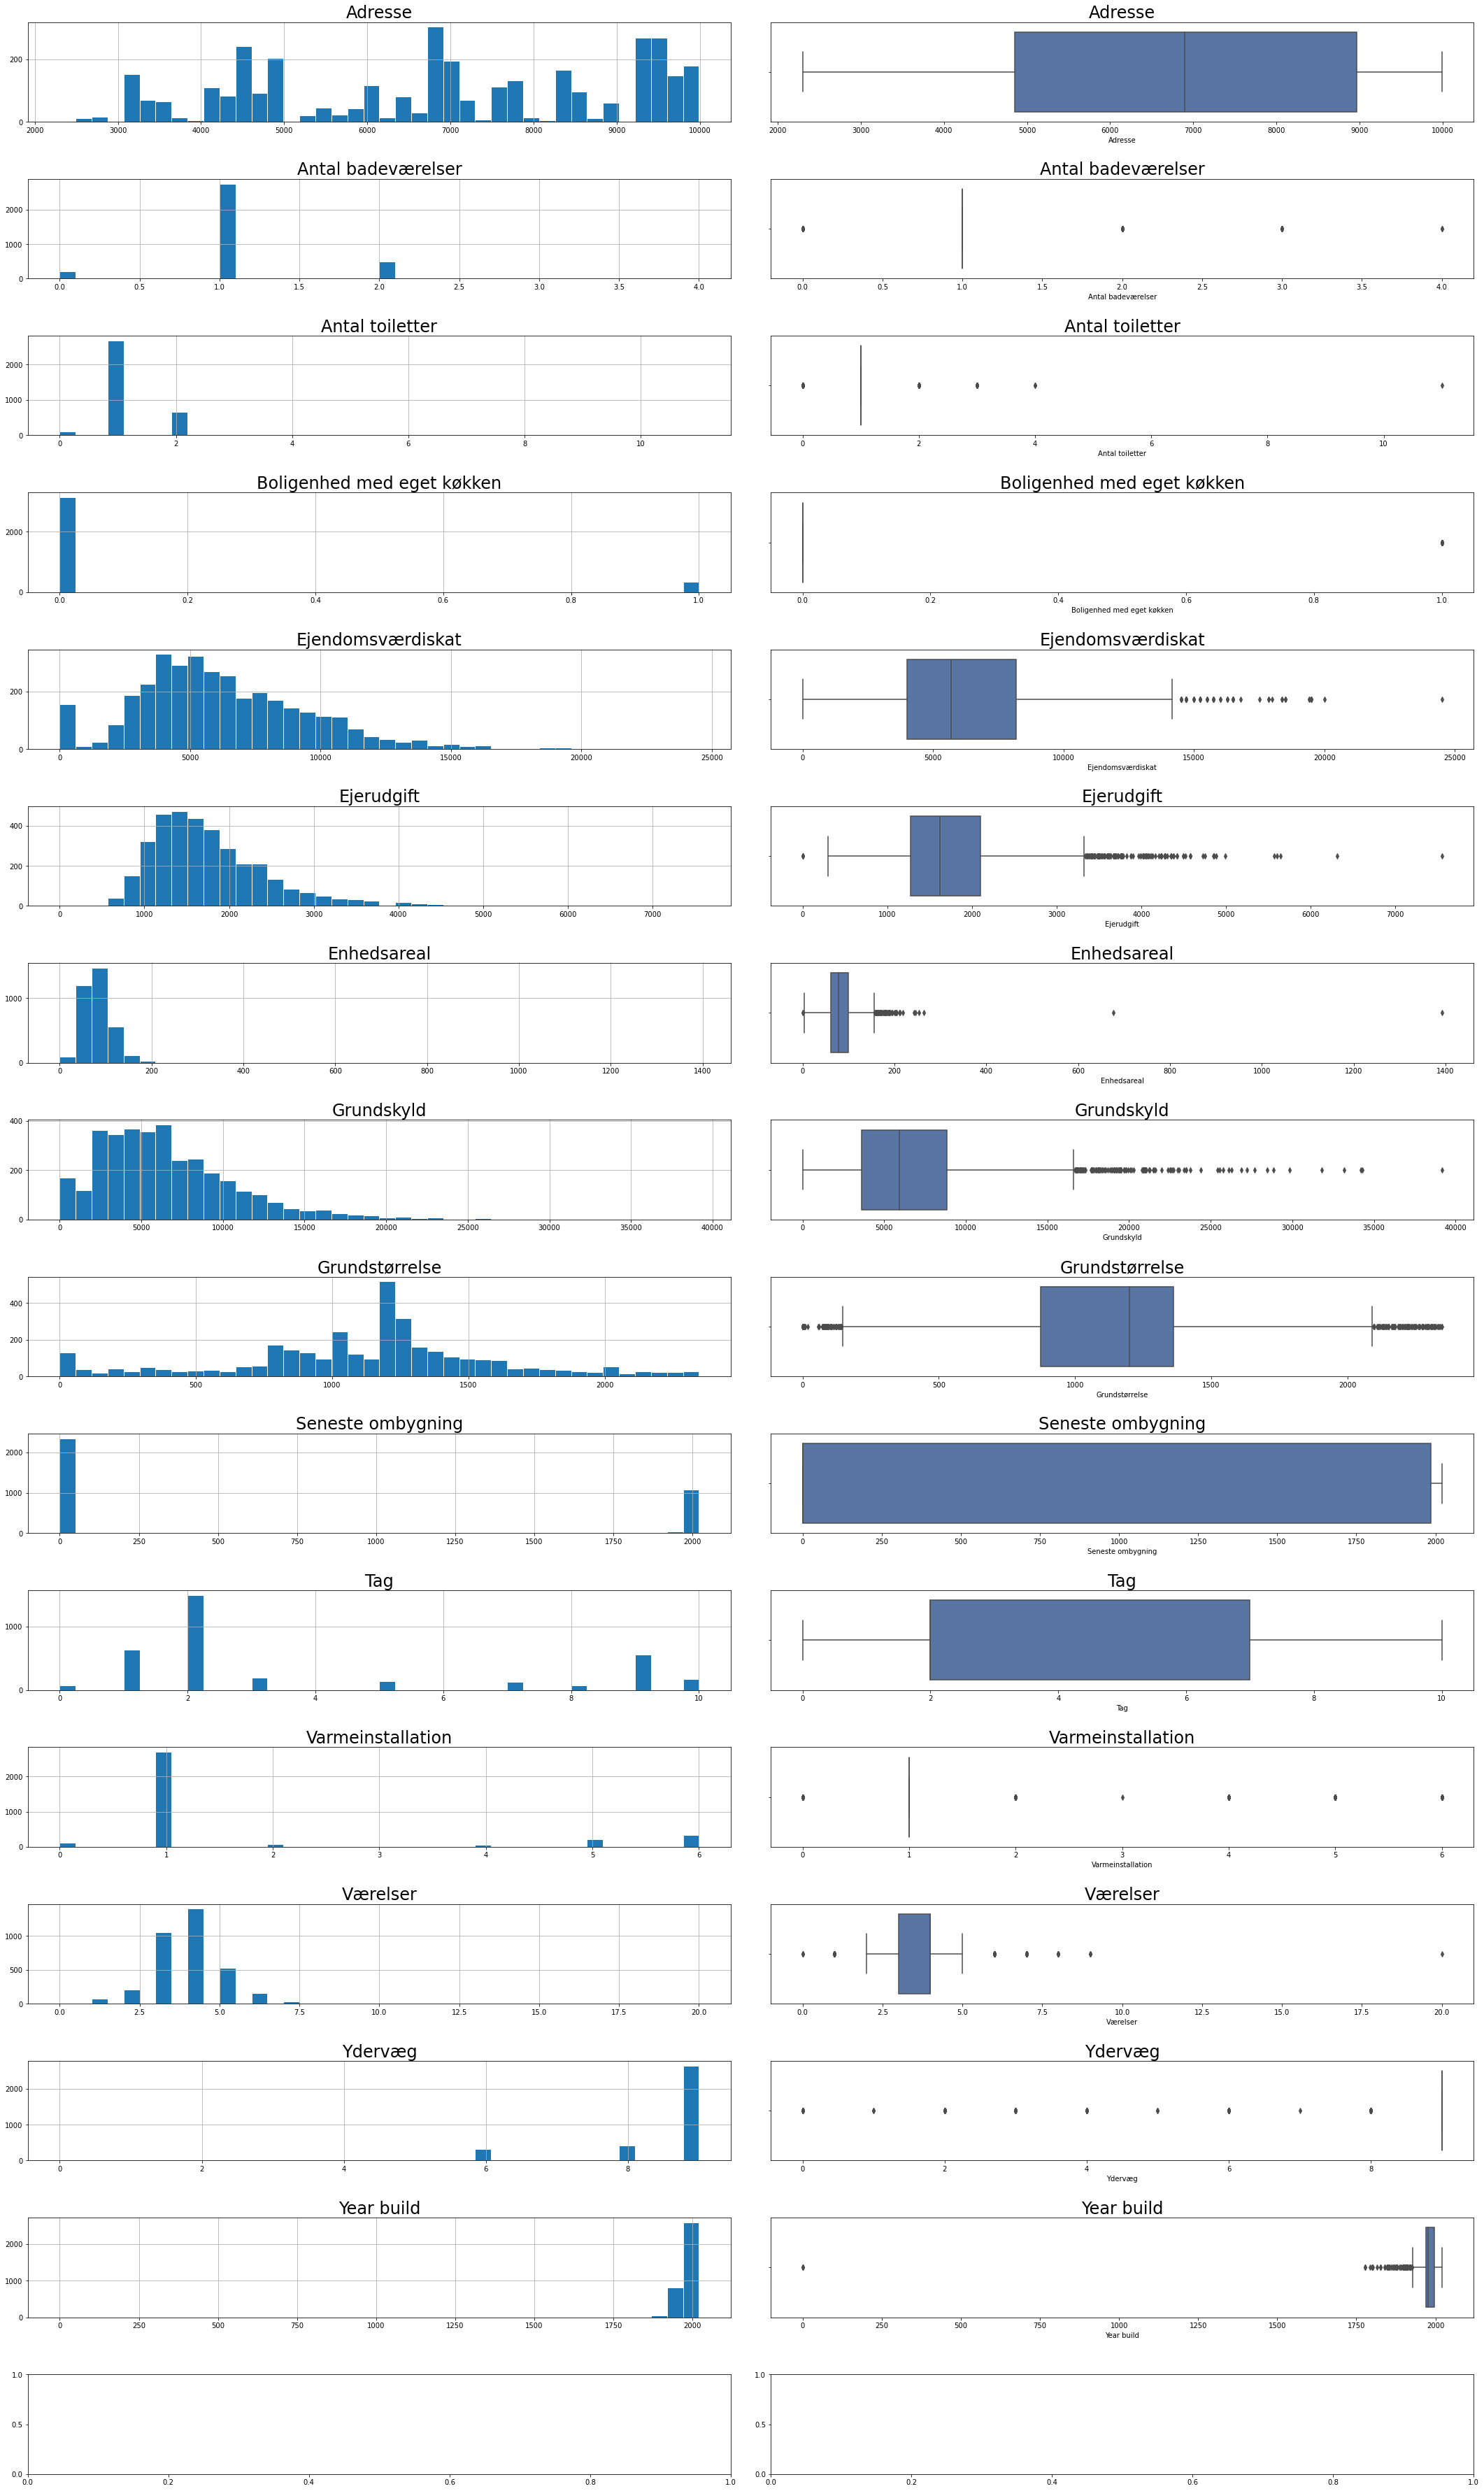

In [3]:
columns = np.setdiff1d(data.columns.to_numpy(),'Pris')
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(30,50))
sb.set(font_scale=2)

for col in enumerate(columns):
    data[col[1]].hist(ax=axes[col[0],0], bins=40);
    axes[col[0],0].set_title(col[1])
    sb.boxplot(ax=axes[col[0],1], x=data[col[1]])
    axes[col[0],1].set_title(col[1])

plt.tight_layout()

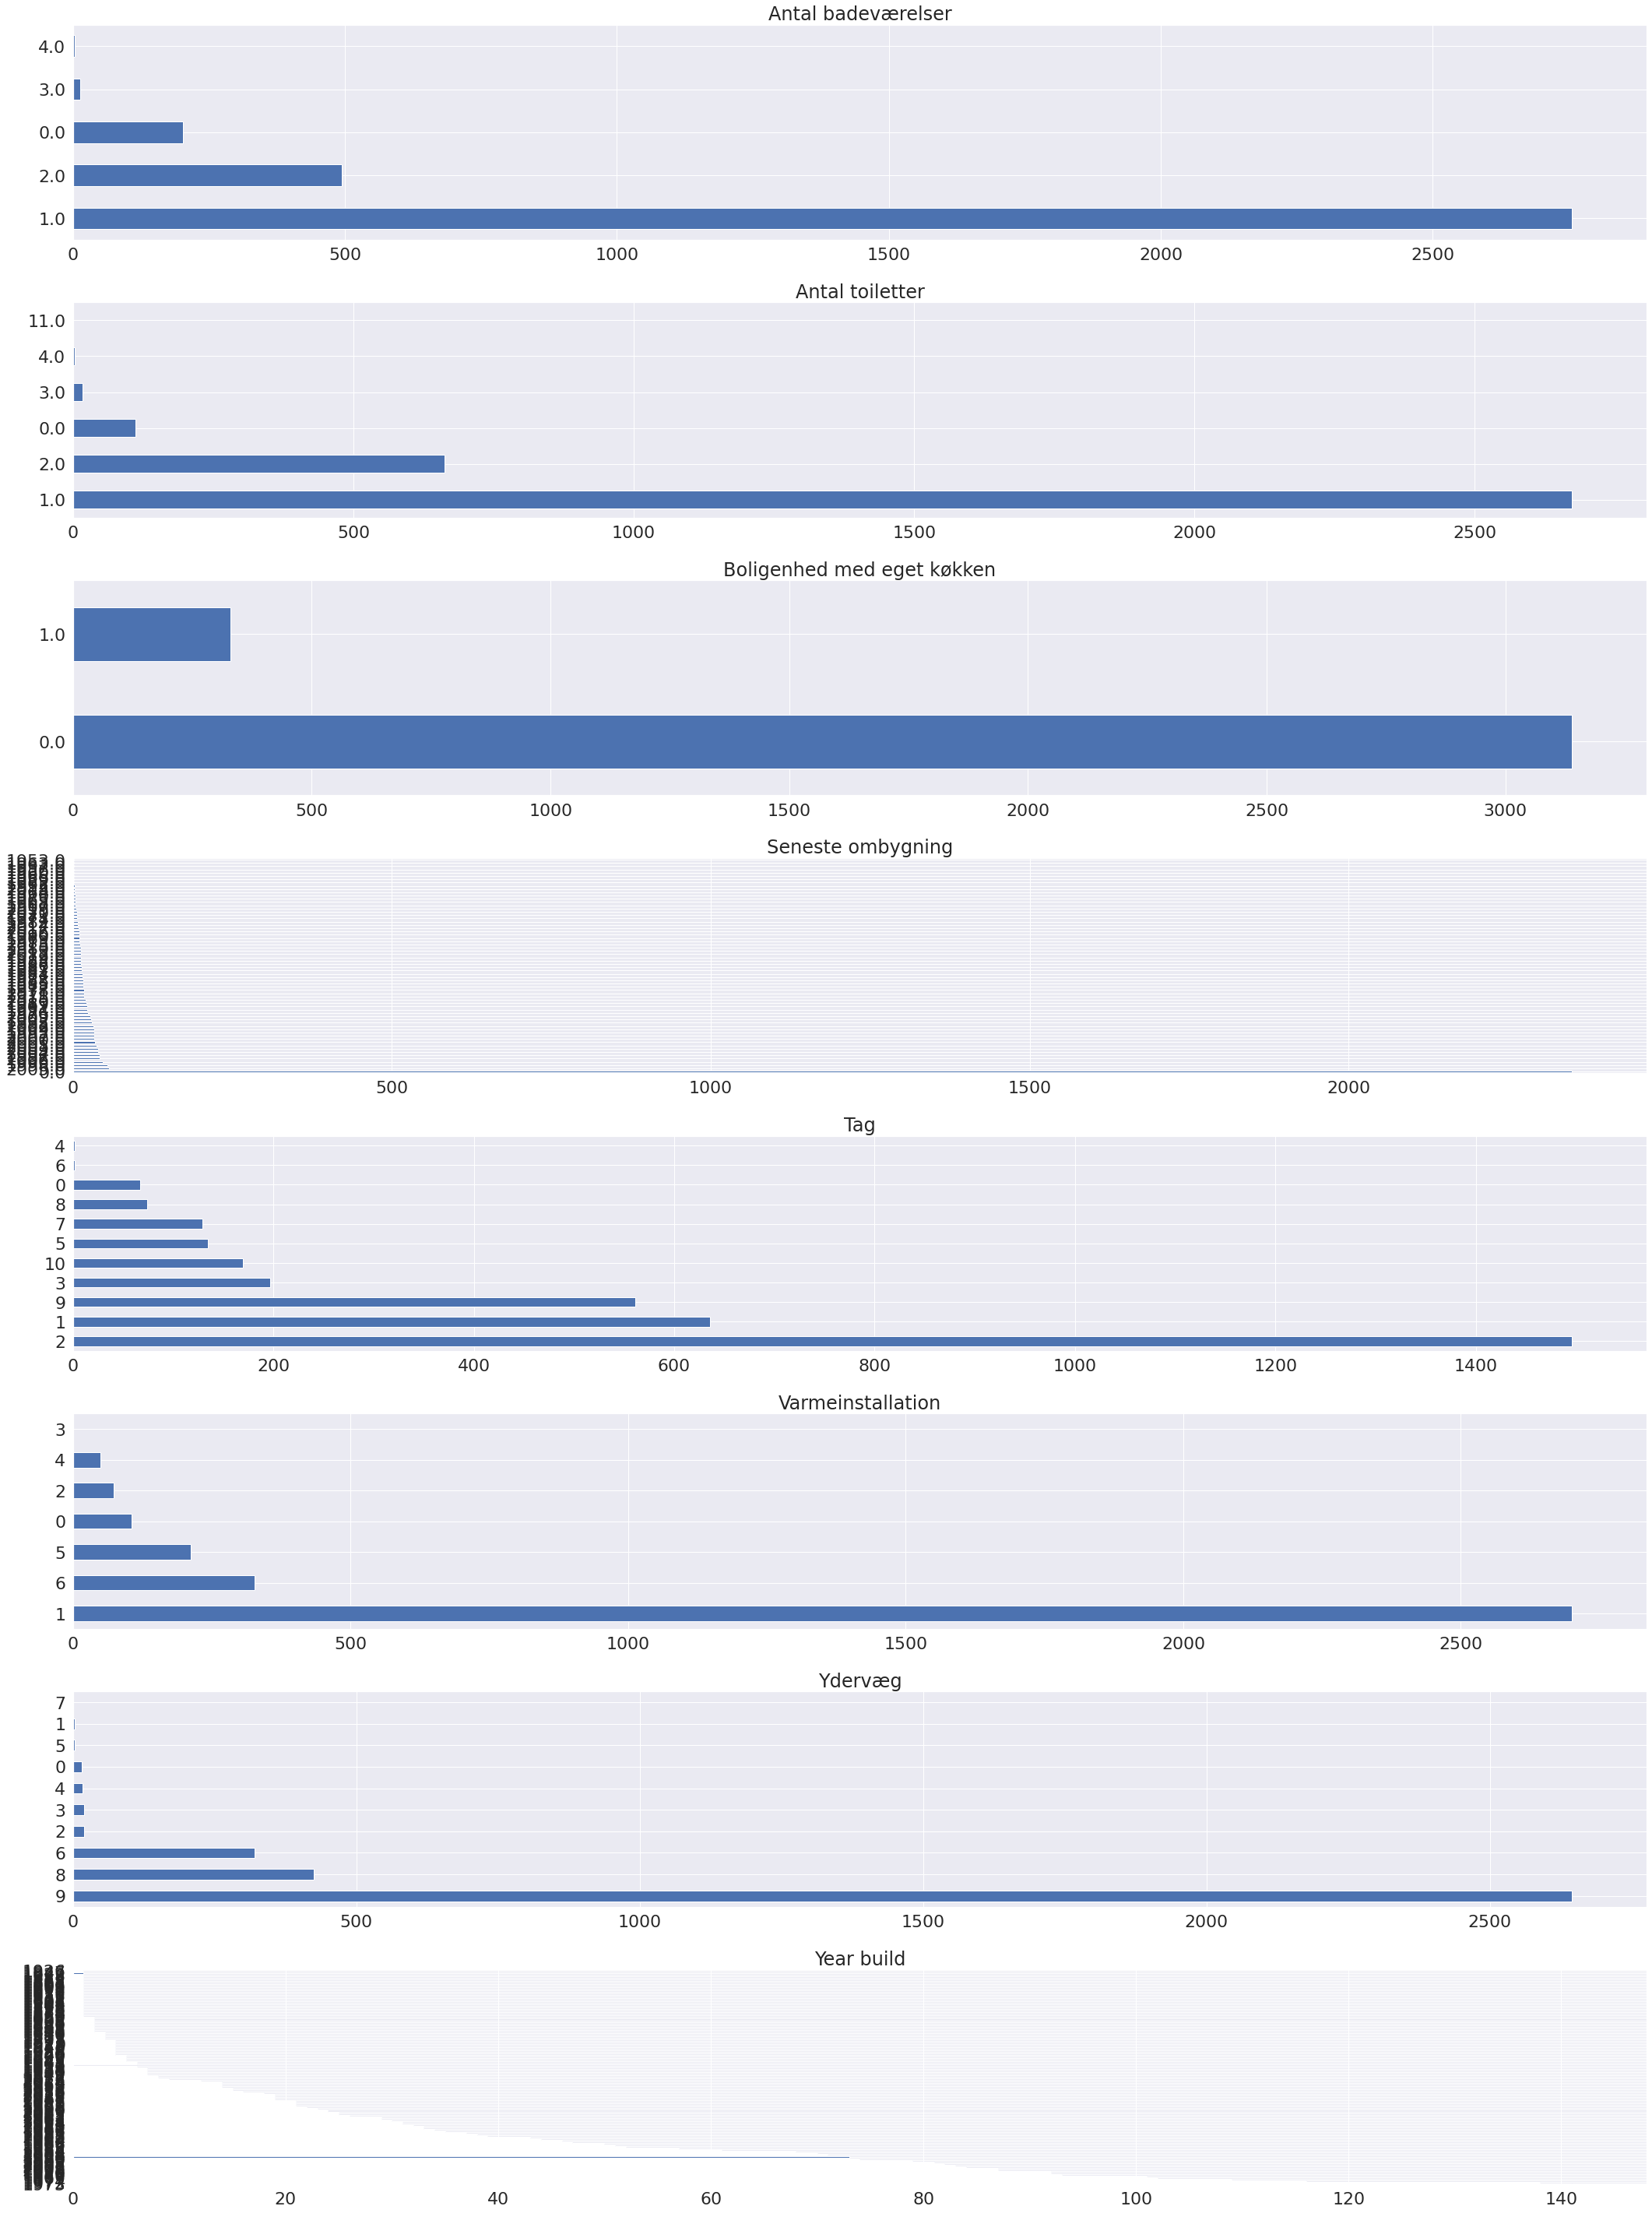

In [4]:
columns = ['Antal badeværelser', 'Antal toiletter', 'Boligenhed med eget køkken','Seneste ombygning', 'Tag', 'Varmeinstallation','Ydervæg','Year build']
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(30,40))
sb.set(font_scale=2)

for col in enumerate(columns):
    pd.value_counts(data[col[1]]).plot(kind='barh',ax=axes[col[0]])
    axes[col[0]].set_title(col[1]);
    
plt.tight_layout()

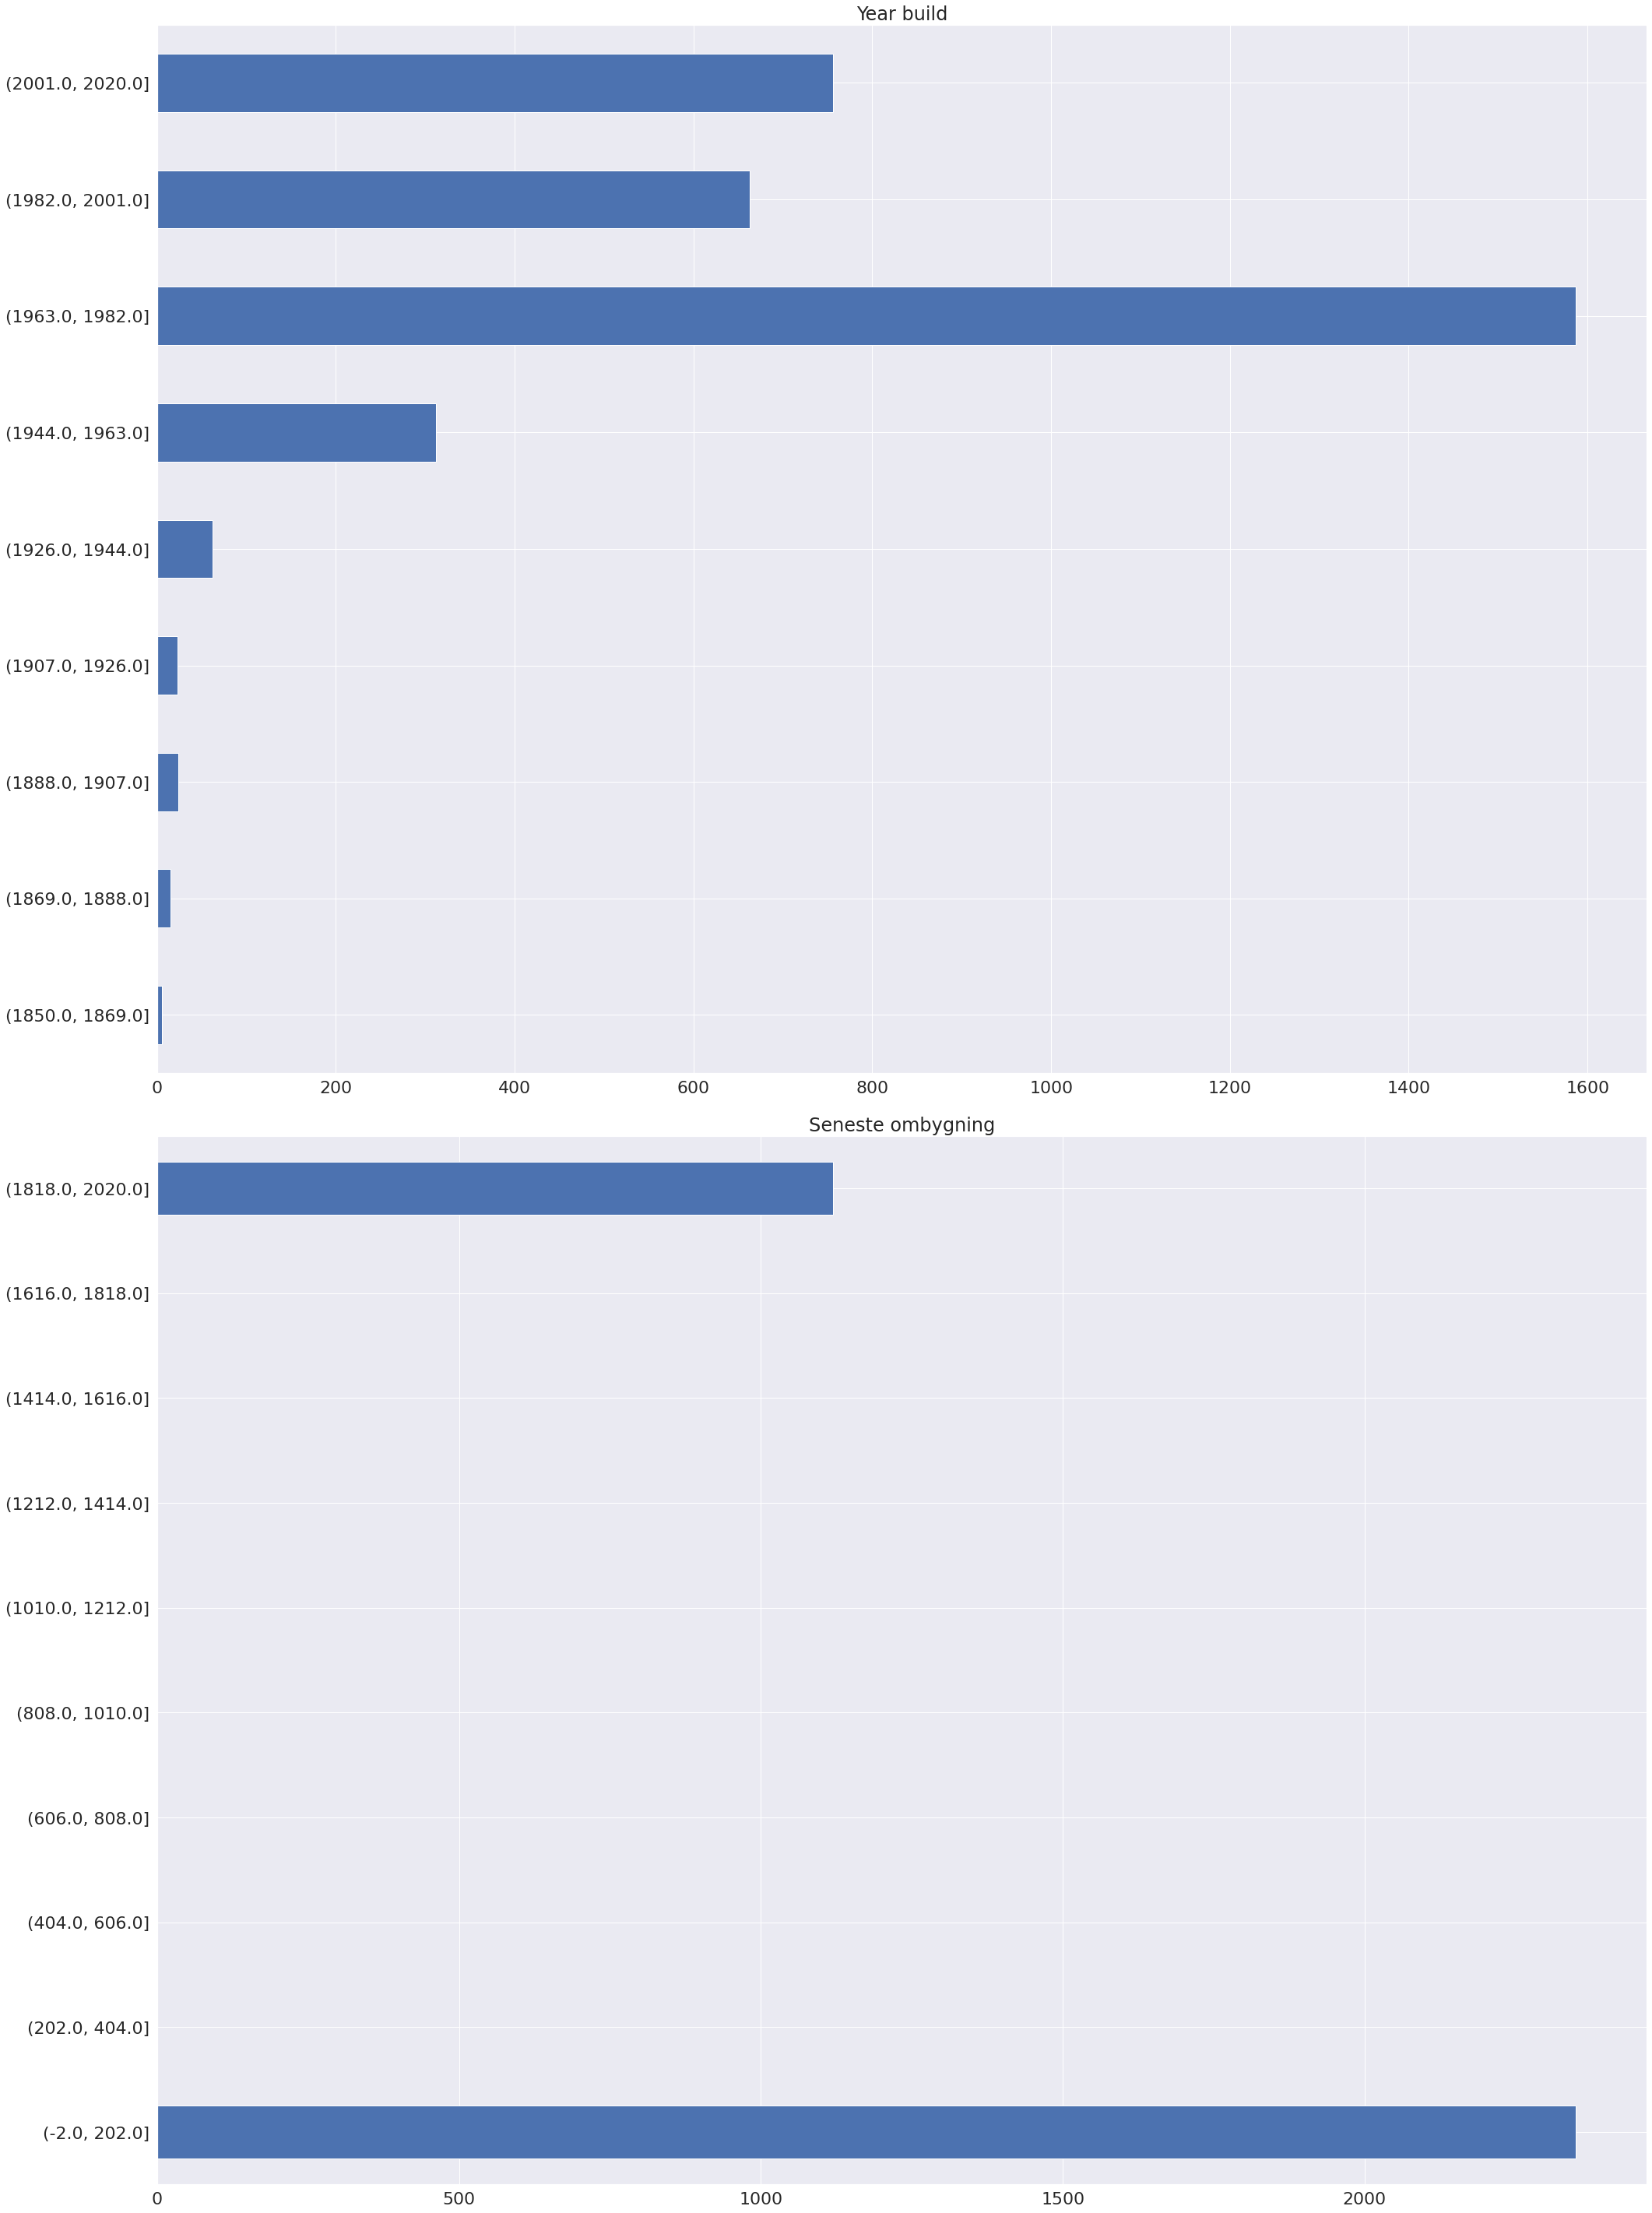

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,40))
sb.set(font_scale=2)

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Year build'], bins=bins, precision=0), sort=False).plot(kind='barh',ax=axes[0])
axes[0].set_title('Year build');

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Seneste ombygning'], 10, precision=0), sort=False).plot(kind='barh',ax=axes[1])
axes[1].set_title('Seneste ombygning');



plt.tight_layout()